<a href="https://colab.research.google.com/github/Predic-learning/AI/blob/main/Logit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

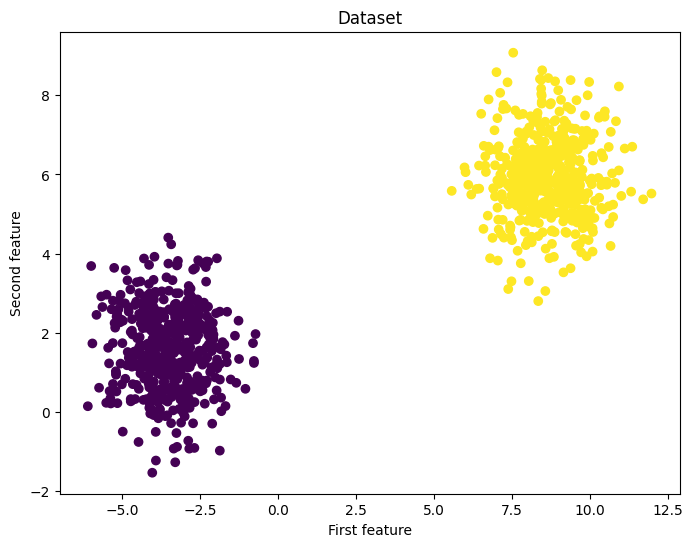

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples= 1000, centers=2)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [ ]:
# Reshape targets to get column vector with shape (n_samples, 1)
y_true = y_true[:, np.newaxis]
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (750, 2)
Shape y_train: (750, 1)
Shape X_test: (250, 2)
Shape y_test: (250, 1)


In [ ]:
class LogisticRegression:
    def __init__(self):
        pass
    def sigmoid(self, a):
        return 1 / (1 + np.exp(-a))
    def train(self, X, y_true, n_iters, learning_rate):
        """Trains the logistic regression model on given data X and targets y """
        # Step 0: Initialize the parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        costs = []

        for i in range(n_iters):
            # Step 1 and 2: Compute a linear combination of the input features and weights,
            # apply the sigmoid activation function
            y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)

            # Step 3: Compute the cost over the whole training set.
            cost = (- 1 / n_samples) * np.sum(y_true * np.log(y_predict) + (1 - y_true) * (np.log(1 - y_predict)))

            # Step 4: Compute the gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predict - y_true))
            db = (1 / n_samples) * np.sum(y_predict - y_true)

            # Step 5: Update the parameters
            self.weights = self.weights - learning_rate * dw
            self.bias = self.bias - learning_rate * db

            costs.append(cost)
            if i % 100 == 0:
                print(f"Cost after iteration {i}: {cost}")
        return self.weights, self.bias, costs

    def predict(self, X):
        """Predicts binary labels for a set of examples X. """
        y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_predict_labels = [1 if elem > 0.5 else 0 for elem in y_predict]
        return np.array(y_predict_labels)[:, np.newaxis]



Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.0741472282214737
Cost after iteration 200: 0.04238520530326553
Cost after iteration 300: 0.030105355413279616
Cost after iteration 400: 0.023527274767561068
Cost after iteration 500: 0.01940558282006379


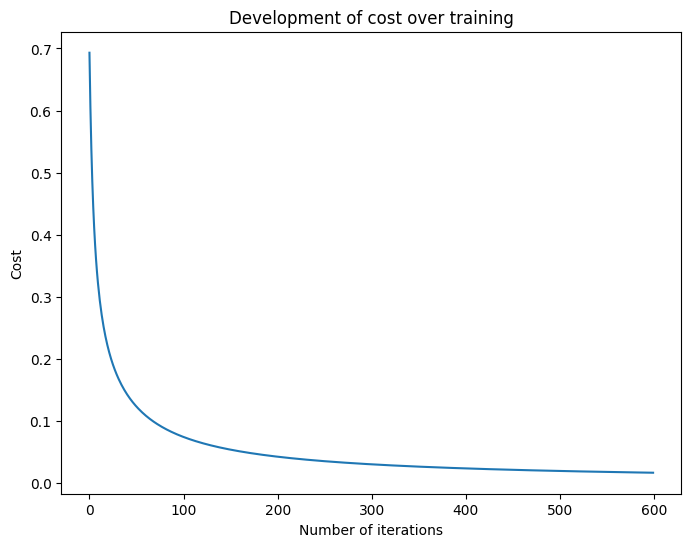

In [ ]:
regressor = LogisticRegression()
w_trained, b_trained, costs = regressor.train(X_train, y_train, n_iters=600, learning_rate=0.009)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(600), costs)
plt.title("Development of cost over training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [ ]:
y_p_train = regressor.predict(X_train)
y_p_test = regressor.predict(X_test)

print(f"train accuracy: {100 - np.mean(np.abs(y_p_train - y_train)) * 100}%")
print(f"test accuracy: {100 - np.mean(np.abs(y_p_test - y_test))}%")

train accuracy: 100.0%
test accuracy: 100.0%


Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



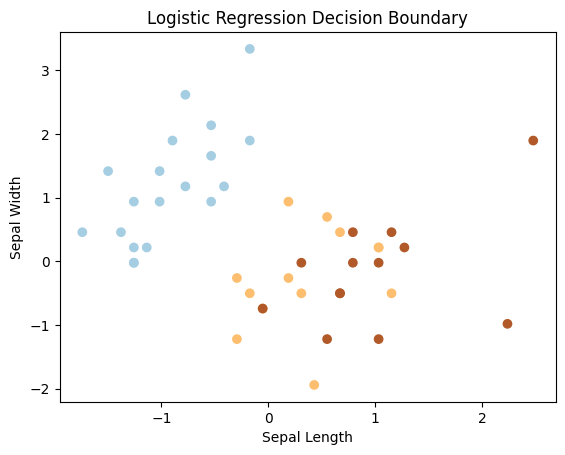

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

'''plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset")'''

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the classes on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the decision boundary (2D plot for simplicity)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Logistic Regression Decision Boundary')
plt.show()


Text(0.5, 1.0, 'Dataset')

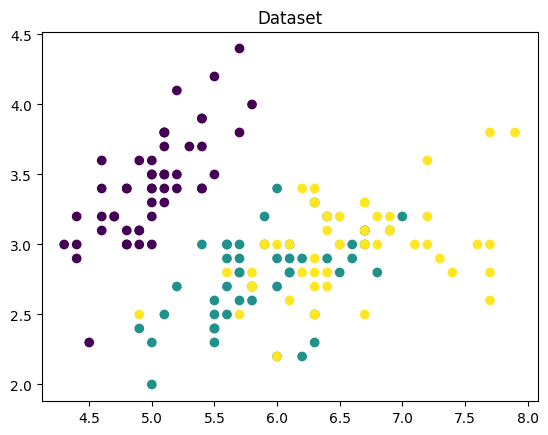

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset")